In [77]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def distinct_values(n, N):
    """
    This function expresses the expected number of distinct values in a random sequence of n integers between 1 and N

    :param n: Number of values in a list
    :param N: Maximum for each value of list
    :return: Return the expected number of distinct values
    """
    p_distinct = ((1 - (1 / N)) ** n)
    return round(p_distinct * n)

In [79]:
def get_random_sequence(n, N):
    """
    This function returns a sequence of n random integers between 1 and N

    :param n: Number of values in sequence
    :param N: Maximum value each integer
    """

    sequence = [random.randint(1, N) for i in range(0, n)]
    return sequence

In [80]:
def get_unique_values(sequence):
    """
    This function returns a sequence of integer that appear ONLY ONCE in the sequence

    :param sequence: Sequence of integers
    """
    return [n for n in sequence if sequence.count(n) == 1]

In [81]:
n = 10000
N = 10000

sequence = get_random_sequence(n, N)
actual_no_unique_integers = len(get_unique_values(sequence))
expected_no_unique_integers = distinct_values(n, N)

err = abs(actual_no_unique_integers - expected_no_unique_integers) / actual_no_unique_integers if actual_no_unique_integers != 0 else 0

print(f'Actual: {actual_no_unique_integers}')
print(f'Expected: {expected_no_unique_integers}')
print(f'Error perc: {err}')

Actual: 3732
Expected: 3679
Error perc: 0.01420150053590568


In [82]:
data = []

for n in tqdm(range(1, 10000, 500)):
    for N in range(1, 10000, 500):
        sequence = get_random_sequence(n, N)
        actual_no_unique_integers = len(get_unique_values(sequence))
        expected_no_unique_integers = distinct_values(n, N)

        err = abs(actual_no_unique_integers - expected_no_unique_integers) / actual_no_unique_integers if actual_no_unique_integers != 0 else 0
        data.append([n, N, err])

data = np.array(data)

100%|██████████| 20/20 [01:34<00:00,  4.71s/it]


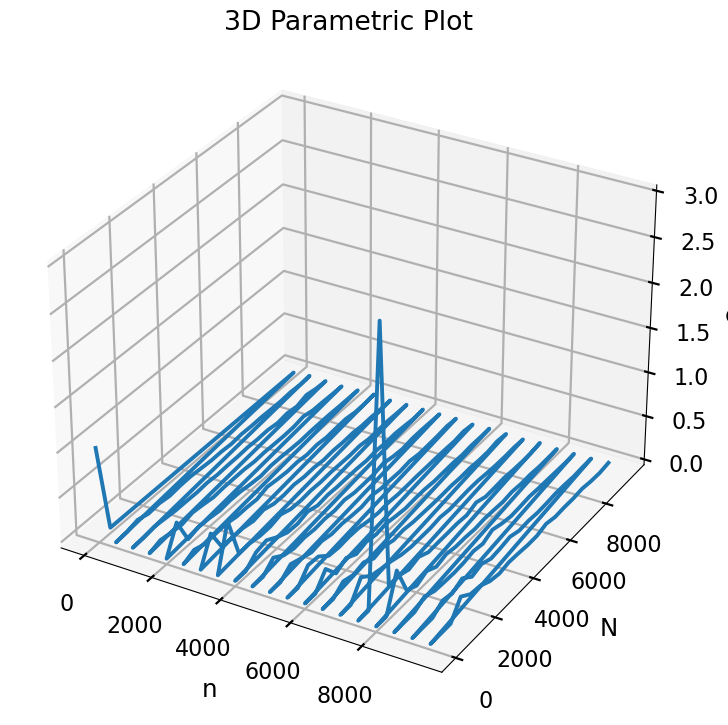

In [83]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(data[:,0], data[:,1], data[:,2])
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('n', labelpad=20)
ax.set_ylabel('N', labelpad=20)
ax.set_zlabel('err', labelpad=20)

plt.show()


**Notes to self**

Reference study section 1.3.5 of the textbook “Mining of Massive Data Sets”

As we can see the error gets lower and lower when a diminishes. A = n/N, has N gets bigger a get smaller so the error gets smaller as well